# HW 1 – Probability Theory

## Problem 1

### Scenario 1: The chocolate bars are all the same

In this case, we are essentially finding the number of non-negative integer solutions to the equation:

$ x_1 + x_2 + \dots + x_{10} = 15 $
Using the "stars and bars" method, the number of ways is:
$ \binom{15+10-1}{15} = \binom{24}{15} $

- **Sampling**: Without replacement (each chocolate bar is given away only once)
- **Order**: Does not matter

**Solution:** $ \binom{24}{15}$ ways = $1,307,504$.


### Scenario 2: The chocolate bars are all the same, and each child must receive at least one

First, give one chocolate bar to each child. We are left with distributing 5 chocolate bars among the 10 children. The equation becomes:


$ x_1 + x_2 + \dots + x_{10} = 5 $
Using the "stars and bars" method:
$ \binom{5+10-1}{5} = \binom{14}{5} $

- **Sampling**: Without replacement
- **Order**: Does not matter

**Solution:** $ \binom{14}{5} $ ways = $2,002$.


### Scenario 3: The chocolate bars are not all the same

Here, distributing the bars is a permutation problem. The total number of ways is:
$ \frac{15!}{(15-10)!} = \frac{15!}{5!} $ <br>

- **Sampling**: Without replacement
- **Order**: Matters

Solution: $ \frac{15!}{5!} $ ways = $10,897,286,400$.

### Alternative

- $C(24,10)$ ways, without replacement, order doesn't matter.
- $C(14,10)$ ways, without replacement, order doesn't matter.
- $10^15$ ways, without replacement, order matters.

## Problem 2

## Problem 3

$P(X = r) = \binom{n}{r} \left(\frac{m_1}{m}\right)^r \left(1-\frac{m_1}{m}\right)^{n-r}$

## Problem 4

Threshold where p <= 1% : 36


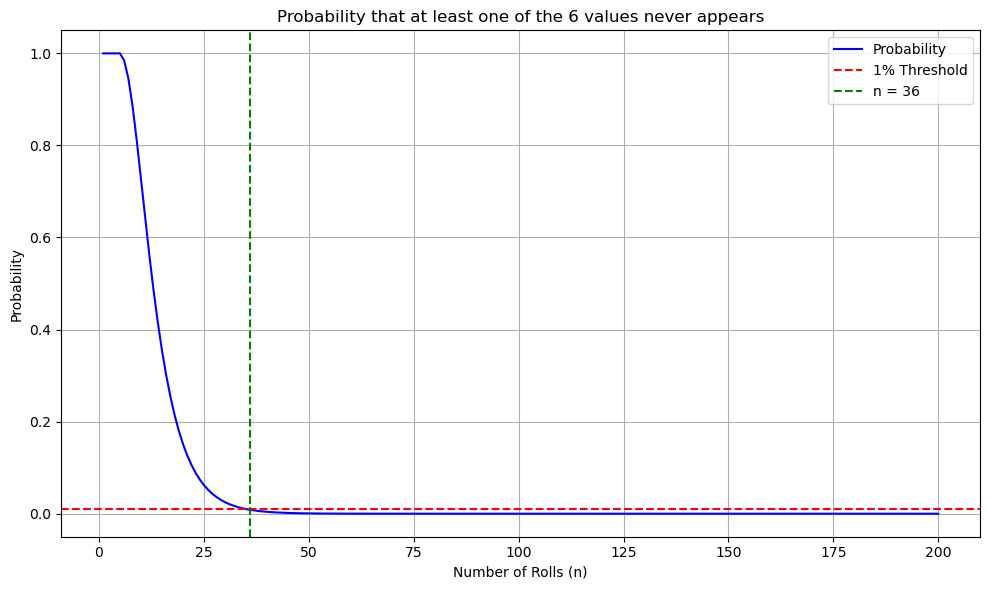

In [1]:
import matplotlib.pyplot as plt
from math import comb

# Define the probability function using the principle of inclusion-exclusion
def probability(n):
    total = 0
    for k in range(1, 7):  # k goes from 1 to 6
        total += (-1)**(k+1) * comb(6, k) * ((6-k)/6)**n
    return total


# Calculate probabilities for n from 1 to 200 (as an upper bound)
n_values = list(range(1, 201))
probabilities = [probability(n) for n in n_values]

# Find the value of n where the probability becomes less than 1%
n_threshold = next(n for n, p in zip(n_values, probabilities) if p < 0.01)
print("Threshold where p <= 1% :", n_threshold)


# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities, label='Probability', color='blue')
plt.axhline(y=0.01, color='red', linestyle='--', label='1% Threshold')
plt.axvline(x=n_threshold, color='green', linestyle='--', label=f'n = {n_threshold}')
plt.xlabel('Number of Rolls (n)')
plt.ylabel('Probability')
plt.title('Probability that at least one of the 6 values never appears')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Problem 5

Let's denote  $A_i$  as the event that the  $i^{th}$  visitor gets his hat. We want to find the probability of the union of these events, i.e.,  $P(A_1 \cup A_2 \cup ... \cup A_n)$.

Using the inclusion-exclusion principle, this probability is given by:

$
P(A_1 \cup A_2 \cup ... \cup A_n) = \sum_{i=1}^{n} P(A_i) - \sum_{1 \leq i < j \leq n} P(A_i \cap A_j) + \sum_{1 \leq i < j < k \leq n} P(A_i \cap A_j \cap A_k) - ... + (-1)^{n+1} P(A_1 \cap A_2 \cap ... \cap A_n)
$

1. The probability that exactly one visitor gets his hat is  $P(A_i) = \frac{1}{n}$ . Since there are  n  such terms, the sum of these probabilities is  $n \times \frac{1}{n} = 1$.

2. The probability that exactly two visitors get their hats is  $P(A_i \cap A_j) = \frac{1}{n(n-1)}$. There are  $\binom{n}{2}$  such terms, so the sum of these probabilities is $\binom{n}{2} \times \frac{1}{n(n-1)}$.

3. Similarly, the probability that exactly three visitors get their hats is  $P(A_i \cap A_j \cap A_k) = \frac{1}{n(n-1)(n-2)}$. There are  $\binom{n}{3}$  such terms, so the sum of these probabilities is  $\binom{n}{3} \times \frac{1}{n(n-1)(n-2)}$.

4. Continuing this pattern, the probability that all  n  visitors get their hats is $P(A_1 \cap A_2 \cap ... \cap A_n) = \frac{1}{n!}$.

Substituting these values into the inclusion-exclusion formula, we get:

$
P(A_1 \cup A_2 \cup ... \cup A_n) = 1 - \binom{n}{2} \times \frac{1}{n(n-1)} + \binom{n}{3} \times \frac{1}{n(n-1)(n-2)} - ... + (-1)^{n+1} \times \frac{1}{n!}
$

**For  $n = 4$:**

Substituting  $n = 4$  into the above formula, we get:

$
P = 1 - \binom{4}{2} \times \frac{1}{4 \times 3} + \binom{4}{3} \times \frac{1}{4 \times 3 \times 2} - \frac{1}{4!}
$

Computing this value, we find:

$
P = \frac{5}{8} \text{ or } 0.625
$

In conclusion, when there are $4$ visitors and their hats are randomly permuted, there's a $62.5\%$ chance that at least one visitor will get his own hat back.